In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
conn = sqlite3.connect("sales_data.db")

In [5]:
cursor = conn.cursor()
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [31]:
cursor.execute("SELECT COUNT(*) FROM sales")
if cursor.fetchone()[0] == 0:
    sample_data = [
        ("Apple", 10, 2.5),
        ("Banana", 20, 1.0),
        ("Orange", 15, 1.5),
        ("Pineapple", 5, 2.5),
        ("Guava", 10, 1.0),
        ("Grape", 8, 3.0)
    ]
    cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
    conn.commit()

In [33]:
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

In [35]:
print("Sales Summary:")
print(df)

Sales Summary:
       product  total_qty  revenue
0        Apple         90  16200.0
1       Apples         50   3675.0
2       Banana        150  12000.0
3      Bananas         80    870.0
4        Grape         75  12700.0
5       Grapes         40   6400.0
6        Guava         72   6080.0
7       Guavas         16   1600.0
8       Orange        108  12960.0
9      Oranges         64   2940.0
10   Pineapple        135   9450.0
11  Pineapples         30   2100.0


<Figure size 600x400 with 0 Axes>

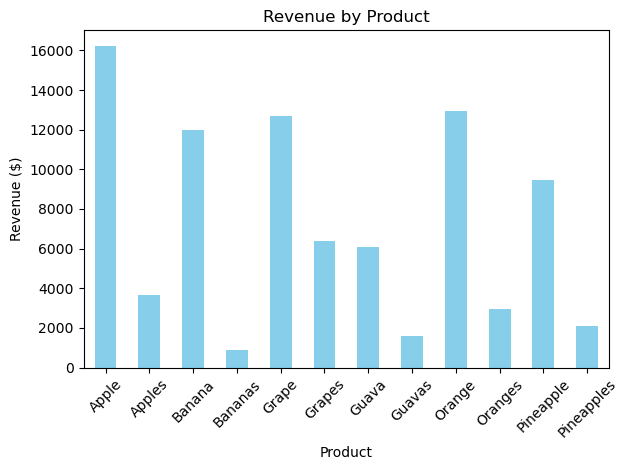

In [37]:
plt.figure(figsize=(6,4))
df.plot(kind="bar", x="product", y="revenue", legend=False, color="skyblue")
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
plt.savefig("sales_chart.png")

<Figure size 640x480 with 0 Axes>